# Project: Dog vs Cat Classification

In [141]:
from pathlib import Path
import os
import torch
from torch import nn

In [142]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [143]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [144]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Dog, Shape: (270, 165, 3)')

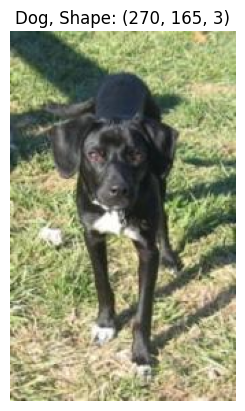

In [145]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [146]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [147]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [148]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.6706, 0.6706, 0.6902,  ..., 0.1882, 0.2039, 0.1725],
         [0.7333, 0.6863, 0.6471,  ..., 0.1569, 0.1725, 0.1686],
         [0.7176, 0.7294, 0.7059,  ..., 0.1843, 0.2000, 0.2039],
         ...,
         [0.7098, 0.8235, 0.7804,  ..., 0.6039, 0.6588, 0.7451],
         [0.7333, 0.7725, 0.7882,  ..., 0.6118, 0.6902, 0.6824],
         [0.7490, 0.6784, 0.7176,  ..., 0.6549, 0.6196, 0.5922]],

        [[0.7216, 0.7176, 0.7255,  ..., 0.2902, 0.3098, 0.2784],
         [0.7922, 0.7451, 0.7098,  ..., 0.2471, 0.2588, 0.2549],
         [0.7882, 0.8000, 0.7765,  ..., 0.2667, 0.2706, 0.2745],
         ...,
         [0.6510, 0.7686, 0.7098,  ..., 0.6000, 0.6353, 0.7059],
         [0.6627, 0.7098, 0.7098,  ..., 0.5961, 0.6588, 0.6431],
         [0.6745, 0.6235, 0.6627,  ..., 0.6353, 0.6078, 0.5922]],

        [[0.5020, 0.4941, 0.5020,  ..., 0.2784, 0.2941, 0.2667],
         [0.5686, 0.5216, 0.4980,  ..., 0.2431, 0.2588, 0.2510],
         [0.5608, 0.5765, 0.5569,  ..., 0.2510, 0.2510, 0.

Text(0.5, 1.0, 'Dog, Shape: torch.Size([3, 64, 64])')

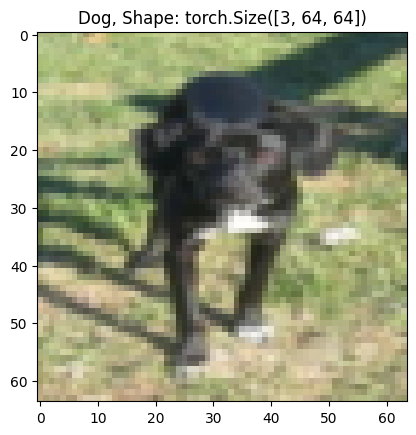

In [149]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [150]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 642
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [151]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [152]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [153]:
len(train_data), len(test_data)

(642, 160)

# Turn loaded images into 'DataLoader'

In [154]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x206a21c3e80>,
 <torch.utils.data.dataloader.DataLoader at 0x206a21c39d0>)

In [155]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [156]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
           # nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [157]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Seq

In [158]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [159]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[-1.0317],
        [-0.7546],
        [-0.2224],
        [-0.7088],
        [-0.3919],
        [-0.6756],
        [-0.7093],
        [-1.0741],
        [-0.8784],
        [-1.5522],
        [-0.4906],
        [-1.4519],
        [-1.6840],
        [-0.8889],
        [ 0.1631],
        [-0.6287],
        [-1.1396],
        [-0.9453],
        [-0.9968],
        [-0.8946],
        [-0.0301],
        [-0.3563],
        [-1.1601],
        [-0.8193],
        [ 0.1296],
        [-1.3066],
        [-1.2473],
        [-1.0231],
        [-1.2247],
        [-0.6051],
        [-0.1804],
        [-0.8513]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [160]:
from tqdm import tqdm
import time

In [161]:
epochs = 5

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

 20%|██        | 1/5 [00:01<00:07,  1.76s/it]

Epoch: 0 | Train Loss: 0.8332, Train Accuracy: 53.12 | Test Loss: 0.7127675294876099, Test Accuracy: 51.24999999999999


 40%|████      | 2/5 [00:03<00:04,  1.60s/it]

Epoch: 1 | Train Loss: 0.6690, Train Accuracy: 59.38 | Test Loss: 0.6782905161380768, Test Accuracy: 60.62499999999999


 60%|██████    | 3/5 [00:05<00:03,  1.73s/it]

Epoch: 2 | Train Loss: 0.5994, Train Accuracy: 69.35 | Test Loss: 0.6581970930099488, Test Accuracy: 62.5


 80%|████████  | 4/5 [00:06<00:01,  1.65s/it]

Epoch: 3 | Train Loss: 0.6095, Train Accuracy: 66.67 | Test Loss: 0.6526121258735657, Test Accuracy: 64.375


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

Epoch: 4 | Train Loss: 0.5122, Train Accuracy: 76.64 | Test Loss: 0.6694754898548126, Test Accuracy: 65.625
Total time: 8.108000040054321


# Plot model_0 results

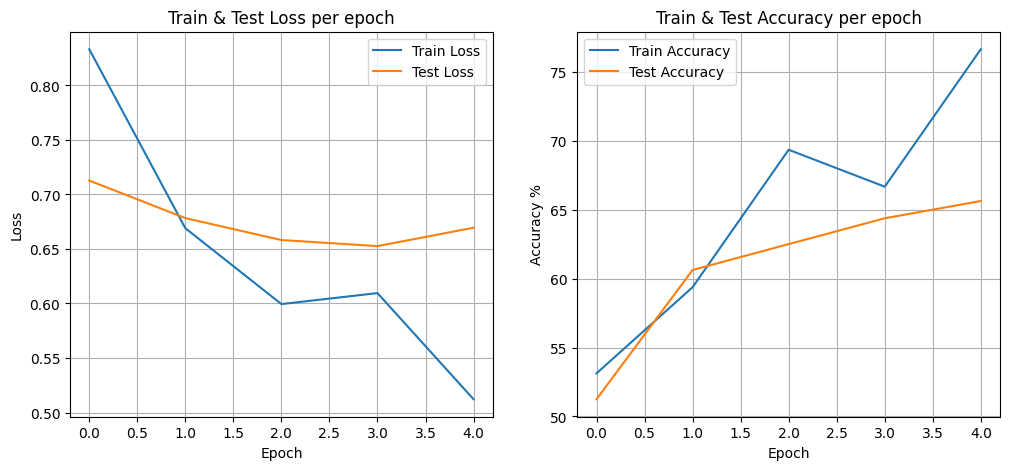

In [162]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [163]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

5 5
5 5


In [164]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [165]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [166]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [167]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 642
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normal

In [168]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x206a23b3850>,
 <torch.utils.data.dataloader.DataLoader at 0x206a23b3df0>)

In [169]:
len(class_names)

2

In [170]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
  

In [171]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.00025
     maximize: False
     weight_decay: 0
 ))

In [172]:
# Train model_1 on augmentation data
epochs = 20

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  5%|▌         | 1/20 [00:02<00:47,  2.51s/it]

Epoch: 0 | Train Loss: 0.6971, Train Accuracy: 53.27 | Test Loss: 0.6939, Test Accuracy: 47.50


 10%|█         | 2/20 [00:05<00:46,  2.57s/it]

Epoch: 1 | Train Loss: 0.6896, Train Accuracy: 55.14 | Test Loss: 0.6931, Test Accuracy: 56.25


 15%|█▌        | 3/20 [00:07<00:43,  2.59s/it]

Epoch: 2 | Train Loss: 0.6855, Train Accuracy: 58.72 | Test Loss: 0.6715, Test Accuracy: 58.13


 20%|██        | 4/20 [00:10<00:41,  2.61s/it]

Epoch: 3 | Train Loss: 0.7169, Train Accuracy: 54.36 | Test Loss: 0.6676, Test Accuracy: 58.75


 25%|██▌       | 5/20 [00:12<00:38,  2.57s/it]

Epoch: 4 | Train Loss: 0.6846, Train Accuracy: 54.67 | Test Loss: 0.6628, Test Accuracy: 60.00


 30%|███       | 6/20 [00:15<00:35,  2.52s/it]

Epoch: 5 | Train Loss: 0.6654, Train Accuracy: 59.66 | Test Loss: 0.6507, Test Accuracy: 61.88


 35%|███▌      | 7/20 [00:17<00:32,  2.48s/it]

Epoch: 6 | Train Loss: 0.6754, Train Accuracy: 57.63 | Test Loss: 0.6543, Test Accuracy: 61.25


 40%|████      | 8/20 [00:20<00:29,  2.47s/it]

Epoch: 7 | Train Loss: 0.6489, Train Accuracy: 59.19 | Test Loss: 0.6583, Test Accuracy: 62.50


 45%|████▌     | 9/20 [00:22<00:27,  2.46s/it]

Epoch: 8 | Train Loss: 0.6662, Train Accuracy: 61.37 | Test Loss: 0.6468, Test Accuracy: 61.25


 50%|█████     | 10/20 [00:25<00:24,  2.47s/it]

Epoch: 9 | Train Loss: 0.6657, Train Accuracy: 61.06 | Test Loss: 0.6430, Test Accuracy: 62.50


 55%|█████▌    | 11/20 [00:27<00:22,  2.46s/it]

Epoch: 10 | Train Loss: 0.6652, Train Accuracy: 57.79 | Test Loss: 0.6489, Test Accuracy: 62.50


 60%|██████    | 12/20 [00:30<00:19,  2.49s/it]

Epoch: 11 | Train Loss: 0.6964, Train Accuracy: 55.45 | Test Loss: 0.6522, Test Accuracy: 60.00


 65%|██████▌   | 13/20 [00:32<00:17,  2.50s/it]

Epoch: 12 | Train Loss: 0.6544, Train Accuracy: 63.55 | Test Loss: 0.6598, Test Accuracy: 61.25


 70%|███████   | 14/20 [00:35<00:15,  2.53s/it]

Epoch: 13 | Train Loss: 0.6563, Train Accuracy: 57.63 | Test Loss: 0.6541, Test Accuracy: 63.12


 75%|███████▌  | 15/20 [00:37<00:12,  2.54s/it]

Epoch: 14 | Train Loss: 0.6802, Train Accuracy: 59.03 | Test Loss: 0.6432, Test Accuracy: 64.38


 80%|████████  | 16/20 [00:40<00:10,  2.57s/it]

Epoch: 15 | Train Loss: 0.6623, Train Accuracy: 59.03 | Test Loss: 0.6445, Test Accuracy: 62.50


 85%|████████▌ | 17/20 [00:43<00:07,  2.61s/it]

Epoch: 16 | Train Loss: 0.6656, Train Accuracy: 62.31 | Test Loss: 0.6468, Test Accuracy: 60.62


 90%|█████████ | 18/20 [00:45<00:05,  2.62s/it]

Epoch: 17 | Train Loss: 0.6802, Train Accuracy: 61.06 | Test Loss: 0.6492, Test Accuracy: 60.62


 95%|█████████▌| 19/20 [00:48<00:02,  2.61s/it]

Epoch: 18 | Train Loss: 0.6386, Train Accuracy: 60.28 | Test Loss: 0.6713, Test Accuracy: 62.50


100%|██████████| 20/20 [00:50<00:00,  2.55s/it]

Epoch: 19 | Train Loss: 0.6593, Train Accuracy: 60.59 | Test Loss: 0.6470, Test Accuracy: 61.25
Total time: 50.988837003707886


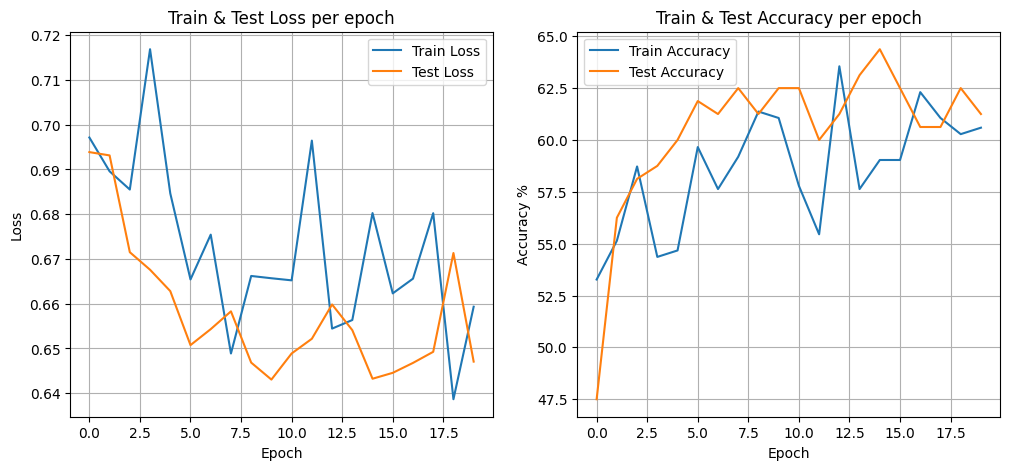

In [173]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [174]:
from torch.utils.data import Subset

In [175]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)